In [2]:
# Imports
from pprint import pprint
import numpy as np
import datetime
import dateutil
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler

# Import Data-Processing
from data.hurdat2 import hurdat2
from errors.models import models

In [4]:
# create DFs
dataset = hurdat2("data/hurdat2.txt") # Note that this data includes up to and including 2016
errors = models("errors/1970-present_OFCL_v_BCD5_ind_ATL_TI_errors_noTDs.txt")

# Show the first 5 records from Hurricane Katrina 2005 (AL122005)
dataset.hurricanes.query('storm_id == "AL122005"').head()

,storm_id,storm_name,entry_time,entry_id,entry_status,lat,long,max_wind,min_pressure,34kt_ne,...,34kt_sw,34kt_nw,50kt_ne,50kt_se,50kt_sw,50kt_nw,64kt_ne,64kt_se,64kt_sw,64kt_nw
14663,AL122005,KATRINA,2005-08-23 18:00:00,,TD,23.1N,75.1W,30,1008,0,...,0,0,0,0,0,0,0,0,0,0
14664,AL122005,KATRINA,2005-08-24 00:00:00,,TD,23.4N,75.7W,30,1007,0,...,0,0,0,0,0,0,0,0,0,0
14665,AL122005,KATRINA,2005-08-24 06:00:00,,TD,23.8N,76.2W,30,1007,0,...,0,0,0,0,0,0,0,0,0,0
14666,AL122005,KATRINA,2005-08-24 12:00:00,,TS,24.5N,76.5W,35,1006,60,...,0,0,0,0,0,0,0,0,0,0
14667,AL122005,KATRINA,2005-08-24 18:00:00,,TS,25.4N,76.9W,40,1003,60,...,0,0,0,0,0,0,0,0,0,0


## Pre-Process Data
We will convert the paths of the previous hurricanes into a format that can be processed.

In [5]:
# Create hurricane class
class hurricane(object) : 
    def __init__(self, name, id) :
        # Set instance variables
        self.name = name
        self.id = id
        self.entries = dict()
        self.models = dict()
        
        return
    # Add hurricane track entry based on standard HURDAT2 format
    def add_entry(self, array) :
        entry = {
            array[0] : { # dateteime of entry
                'entry_time' : array[0], 
                'entry_id' : array[1],
                'entry_status' : array[2],
                'lat' : float(array[3][:-1]), # Convert to number from format '#.#N'
                'long' : float(array[4][:-1]), # Convert to number from format '#.#W'
                'max_wind' : float(array[5]),
                'min_pressure' : None if array[6] is None else float(array[6]), # Early records are -999 or None
                'wind_radii' :  array[7:], # Array based on HURDAT2 format
            }
        }
        self.entries.update(entry)
        
        return
    # Add hurricane model errors
    def add_model(self, name, model) :
        self.models[name] = model
        
        return

storm_ids = dict()

# Parse in hurricanes
hurricanes = dict()
print("Transforming HURDAT2 into objects . . .")
for index, entry in dataset.hurricanes.iterrows() :
    print("Transforming {}/{} entries from HURDAT2".format(index + 1, len(dataset.hurricanes)), end = "\r")
    # New hurricane
    if entry['storm_id'] not in hurricanes :
        hurricanes[entry['storm_id']] = hurricane(entry['storm_name'], entry['storm_id'])
        storm_ids[entry['storm_id']] = entry['storm_name']
    # Add entry to hurricane
    hurricanes[entry['storm_id']].add_entry(entry[2:])
print("\nDone")

Transforming HURDAT2 into objects . . .


Transforming 410/20291 entries from HURDAT2

Transforming 715/20291 entries from HURDAT2

Transforming 1003/20291 entries from HURDAT2

Transforming 1249/20291 entries from HURDAT2

Transforming 1504/20291 entries from HURDAT2

Transforming 2000/20291 entries from HURDAT2

Transforming 2306/20291 entries from HURDAT2

Transforming 2577/20291 entries from HURDAT2

Transforming 2840/20291 entries from HURDAT2

Transforming 3117/20291 entries from HURDAT2

Transforming 3396/20291 entries from HURDAT2

Transforming 3695/20291 entries from HURDAT2

Transforming 3975/20291 entries from HURDAT2

Transforming 4307/20291 entries from HURDAT2

Transforming 4635/20291 entries from HURDAT2

Transforming 4927/20291 entries from HURDAT2

Transforming 5217/20291 entries from HURDAT2

Transforming 5510/20291 entries from HURDAT2

Transforming 5773/20291 entries from HURDAT2

Transforming 6040/20291 entries from HURDAT2

Transforming 6342/20291 entries from HURDAT2

Transforming 6637/20291 entries from HURDAT2

Transforming 6933/20291 entries from HURDAT2

Transforming 7233/20291 entries from HURDAT2

Transforming 7532/20291 entries from HURDAT2

Transforming 7744/20291 entries from HURDAT2

Transforming 8019/20291 entries from HURDAT2

Transforming 8344/20291 entries from HURDAT2

Transforming 8657/20291 entries from HURDAT2

Transforming 8950/20291 entries from HURDAT2

Transforming 9258/20291 entries from HURDAT2

Transforming 9546/20291 entries from HURDAT2

Transforming 9821/20291 entries from HURDAT2

Transforming 10047/20291 entries from HURDAT2

Transforming 10305/20291 entries from HURDAT2

Transforming 10620/20291 entries from HURDAT2

Transforming 10929/20291 entries from HURDAT2

Transforming 11236/20291 entries from HURDAT2

Transforming 11527/20291 entries from HURDAT2

Transforming 11796/20291 entries from HURDAT2

Transforming 12087/20291 entries from HURDAT2

Transforming 12355/20291 entries from HURDAT2

Transforming 12632/20291 entries from HURDAT2

Transforming 12923/20291 entries from HURDAT2

Transforming 13194/20291 entries from HURDAT2

Transforming 13530/20291 entries from HURDAT2

Transforming 13835/20291 entries from HURDAT2

Transforming 14041/20291 entries from HURDAT2

Transforming 14327/20291 entries from HURDAT2

Transforming 14580/20291 entries from HURDAT2

Transforming 14852/20291 entries from HURDAT2

Transforming 15172/20291 entries from HURDAT2

Transforming 15479/20291 entries from HURDAT2

Transforming 15785/20291 entries from HURDAT2

Transforming 16054/20291 entries from HURDAT2

Transforming 16609/20291 entries from HURDAT2

Transforming 16871/20291 entries from HURDAT2

Transforming 17123/20291 entries from HURDAT2

Transforming 17430/20291 entries from HURDAT2

Transforming 17753/20291 entries from HURDAT2

Transforming 18074/20291 entries from HURDAT2

Transforming 18609/20291 entries from HURDAT2

Transforming 18794/20291 entries from HURDAT2

Transforming 19009/20291 entries from HURDAT2

Transforming 19330/20291 entries from HURDAT2

Transforming 19611/20291 entries from HURDAT2

Transforming 19906/20291 entries from HURDAT2

Transforming 20185/20291 entries from HURDAT2

Transforming 20291/20291 entries from HURDAT2
Done


In [6]:
# Get all available model errors
models = errors.models.keys()
# Load model errors into hurricanes
for id in storm_ids :
    for model in models :
        # Skip if this hurricane does not have the model
        if id not in errors.models[model].storm :
            continue
        hurricanes[id].add_model(model, errors.models[model].storm[id])

## Feature Engineering & Data Augmentation
The following section will extract the relevant features and engineer each data point so that we can fit it into the model. Because the type of inputs are important, the features will be transformed based on the model architecture. This will also include data augmentation methods.

The current statistical baseline model using multivariate regression uses multiple predictors as input. According to Knaff 2013, the following predictors were calculated for their intensity model that were not included in the HURDAT2 database. These features can be calculated from the data loaded into our current object model.

In [7]:
def feature_extraction(timestep, previous) :
    features = {
        'lat' : timestep['lat'],
        'long' : timestep['long'],
        'max_wind' : timestep['max_wind'],
        'delta_wind' : (timestep['max_wind'] - previous['max_wind']) / # Calculated from track (12h)
            ((timestep['entry_time'] - previous['entry_time']).total_seconds() / 43200),
        'min_pressure' : timestep['min_pressure'], 
        'zonal_speed' : (timestep['lat'] - previous['lat'])/ # Calculated from track (per hour)
            ((timestep['entry_time'] - previous['entry_time']).total_seconds() / 3600),
        'meridonal_speed' : (timestep['long'] - previous['long'])/# Calculated from track (per hour)
            ((timestep['entry_time'] - previous['entry_time']).total_seconds() / 3600),
        'year' : timestep['entry_time'].year,
        'month' : timestep['entry_time'].month,
        'day' : timestep['entry_time'].day,
        'hour' : timestep['entry_time'].hour,
    }
    return features
    
def storm_x_y(storm, timesteps = 1, lag = 24) :
    x = []
    # Create testing data structure with a dictionary
    times = [time * lag for time in range(1, (120 // lag) + 1)] # Begin at lag hours with lag increments up to 120h inclusive
    y = dict([(time,[]) for time in times])
    
    # Sort by entry time
    entries = [entry[1] for entry in sorted(storm.entries.items())]
    
    for index in range(len(entries)) :
        if index < timesteps : # Flag for insufficient initial time steps
            continue

        # If we're not including None values, check to see if there will be any
        if None in [storm.entries.get(entries[index]['entry_time'] +
                                         datetime.timedelta(hours = future)) for future in times] : break
            
        # Calculate time steps and their features for independent values
        sample = []
        for step in range(timesteps) :
            # Training sample
            timestep = entries[index - step]
            previous = entries[index - step - 1]
            sample.append([timestep['entry_time']] + [[feature_extraction(timestep, previous)]])
        x.append(sample) # Add our constructed sample
        
        # Calculate time steps and their features for dependent values
        for future in times :
            timestep = storm.entries.get(entries[index]['entry_time'] + datetime.timedelta(hours = future))
            previous = storm.entries.get(entries[index]['entry_time'] + datetime.timedelta(hours = future - lag))
            
            if timestep and previous: 
                y[future].append(feature_extraction(timestep, previous))
            else :
                y[future].append(None)
    
    # Return output, if there is no output, return None.
    if len(x) is 0 :
        return None
    else:
        return {'x': x, 'y': y}
def shape(hurricanes, timesteps, remove_missing = True) :
    x = []
    y = []
    lag = 24 # lag time in hours
    precision = np.float64 # defines the precision of our data type
    times = [time * lag for time in range(1, (120 // lag) + 1)] # Begin at lag hours with lag increments up to 120h inclusive
    count = 0
    for hurricane in hurricanes.values() :
        count += 1
        result = storm_x_y(hurricane, timesteps, lag)
        if result is None :
            continue
        # Extract only the values from the strom features using our specified precision
        hurricane_x = np.array(
            [[list(sample[1][0].values()) for sample in x] for x in result['x']],
            dtype = precision)
        hurricane_y = np.array(
            [[list(result['y'][time][index].values()) for time in times] for index in range(len(result['y'][lag]))],
            dtype = precision)
        # Disregard if algorithm requires no missing values
        if remove_missing :
            if (len(np.where(np.isnan(hurricane_x))[0]) > 0) or (len(np.where(np.isnan(hurricane_y))[0]) > 0) :
                continue
        # Add to our results
        x.extend(hurricane_x)
        y.extend(hurricane_y)
        print("Feature engineered {}/{} hurricanes for {} timestep(s)".format(count, len(hurricanes), timesteps), end = "\r")
    print("\nDone feature engineering hurricanes.")
    
    return {'x': np.array(x), 'y': np.array(y)}
def scaler(processed_data, hurricanes) :
    print("Scaling Data . . . (1 timestep for unqiue data)")
    # Create our scaler
    unqiue_data = shape(hurricanes, timesteps = 1)
    x = np.reshape(unqiue_data['x'], (unqiue_data['x'].shape[0], -1))
    x = np.delete(x, np.where(np.isnan(x))[0], 0)
    scaler = RobustScaler()
    scaler.fit(x)
    
    # Scale our data
    for index in range(len(processed_data['x'])) :
        # Scale our x
        processed_data['x'][index] = scaler.transform(processed_data['x'][index])
        # Scale our y
        processed_data['y'][index] = scaler.transform(processed_data['y'][index])
    print("Done scaling.")
    return processed_data, scaler
# Finalize and scale procesed data into a dictionary
preprocessed_data = shape(hurricanes, timesteps = 5)
processed_data, scaler = scaler(preprocessed_data, hurricanes)


Feature engineered 764/764 hurricanes for 5 timestep(s)
Done feature engineering hurricanes.
Scaling Data . . . (1 timestep for unqiue data)
Feature engineered 764/764 hurricanes for 1 timestep(s)
Done feature engineering hurricanes.
Done scaling.


## Building Model

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import TimeDistributed
from keras.layers import Bidirectional
from keras.layers import RepeatVector
from sklearn import model_selection

# Create our cross validation data structure
X_train, X_test, y_train, y_test = model_selection.train_test_split(processed_data['x'], processed_data['y'],
                                                                    test_size = 0.2)

# Train for wind intensity
y_train_wind = np.array([[[features[2]] for features in y] for y in y_train], dtype = np.float64)
y_test_wind = np.array([[[features[2]] for features in y] for y in y_test], dtype = np.float64)

# Train for latitude and longitude location
y_train_lat = np.array([[[features[0]] for features in y] for y in y_train], dtype = np.float64)
y_test_lat = np.array([[[features[0]] for features in y] for y in y_test], dtype = np.float64)
y_train_long = np.array([[[features[1]] for features in y] for y in y_train], dtype = np.float64)
y_test_long = np.array([[[features[1]] for features in y] for y in y_test], dtype = np.float64)


def bd_lstm_td(X_train, y_train, X_test, y_test, n_epochs = 500) :    
    model = Sequential()
    model.add(Bidirectional(LSTM(units = 512, return_sequences = True, dropout = 0.05),
                            input_shape = (X_train.shape[1],X_train.shape[2])))
    model.add(LSTM(units = 256, return_sequences = True, dropout = 0.05))
    model.add(TimeDistributed(Dense(1)))
    model.compile(loss='mse', optimizer='adadelta')
    print(model.summary())
    history = model.fit(X_train, y_train, batch_size = len(X_train), epochs = n_epochs,
                        validation_data = (X_test, y_test))
    return model, history

def lstm_td(X_train, X_test, y_train, y_test) :
    model = Sequential()
    model.add(LSTM(units = 1024, input_shape = (5,8), return_sequences = True))
    model.add(TimeDistributed(Dense(8)))
    model.compile(loss='mean_squared_error', optimizer='adam')
    print(model.summary())
    model.fit(X_train, y_train, batch_size = len(X_train), epochs = 300)
    
    return model

model_wind, model_wind_history = bd_lstm_td(X_train, y_train_wind, X_test, y_test_wind, n_epochs = 100)
model_lat, model_lat_history = bd_lstm_td(X_train, y_train_lat, X_test, y_test_lat, n_epochs = 200)
model_long, model_long_history = bd_lstm_td(X_train, y_train_long, X_test, y_test_long, n_epochs = 200)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_2 (Bidirection (None, 5, 1024)           2146304   
_________________________________________________________________
lstm_4 (LSTM)                (None, 5, 256)            1311744   
_________________________________________________________________
time_distributed_2 (TimeDist (None, 5, 1)              257       
Total params: 3,458,305
Trainable params: 3,458,305
Non-trainable params: 0
_________________________________________________________________
None
Train on 3298 samples, validate on 825 samples
Epoch 1/100
3298/3298 [==============================] - 5s 2ms/step - loss: 0.8931 - val_loss: 0.6975
Epoch 2/100
3298/3298 [==============================] - 5s 2ms/step - loss: 0.6901 - val_loss: 0.6129
Epoch 3/100
3298/3298 [==============================] - 6s 2ms/step - loss: 0.6056 - val_loss: 0.5747
Epoch 4/100
3

3298/3298 [==============================] - 9s 3ms/step - loss: 0.4209 - val_loss: 0.4181
Epoch 73/100
3298/3298 [==============================] - 7s 2ms/step - loss: 0.4205 - val_loss: 0.4194
Epoch 74/100
3298/3298 [==============================] - 6s 2ms/step - loss: 0.4204 - val_loss: 0.4181
Epoch 75/100
3298/3298 [==============================] - 6s 2ms/step - loss: 0.4202 - val_loss: 0.4189
Epoch 76/100
3298/3298 [==============================] - 6s 2ms/step - loss: 0.4195 - val_loss: 0.4181
Epoch 77/100
3298/3298 [==============================] - 6s 2ms/step - loss: 0.4202 - val_loss: 0.4182
Epoch 78/100
3298/3298 [==============================] - 6s 2ms/step - loss: 0.4193 - val_loss: 0.4176
Epoch 79/100
3298/3298 [==============================] - 6s 2ms/step - loss: 0.4220 - val_loss: 0.4172
Epoch 80/100
3298/3298 [==============================] - 7s 2ms/step - loss: 0.4169 - val_loss: 0.4146
Epoch 81/100
3298/3298 [==============================] - 7s 2ms/step - loss:

Epoch 44/200
3298/3298 [==============================] - 6s 2ms/step - loss: 0.2161 - val_loss: 0.1897
Epoch 45/200
3298/3298 [==============================] - 6s 2ms/step - loss: 0.2064 - val_loss: 0.1945
Epoch 46/200
3298/3298 [==============================] - 6s 2ms/step - loss: 0.2059 - val_loss: 0.1834
Epoch 47/200
3298/3298 [==============================] - 7s 2ms/step - loss: 0.2007 - val_loss: 0.1881
Epoch 48/200
3298/3298 [==============================] - 7s 2ms/step - loss: 0.1985 - val_loss: 0.1811
Epoch 49/200
3298/3298 [==============================] - 9s 3ms/step - loss: 0.1961 - val_loss: 0.1841
Epoch 50/200
3298/3298 [==============================] - 9s 3ms/step - loss: 0.1958 - val_loss: 0.1778
Epoch 51/200
3298/3298 [==============================] - 10s 3ms/step - loss: 0.1949 - val_loss: 0.1812
Epoch 52/200
3298/3298 [==============================] - 8s 3ms/step - loss: 0.1948 - val_loss: 0.1763
Epoch 53/200
3298/3298 [==============================] - 6s 2m

Epoch 123/200
3298/3298 [==============================] - 5s 1ms/step - loss: 0.1637 - val_loss: 0.1574
Epoch 124/200
3298/3298 [==============================] - 5s 1ms/step - loss: 0.1669 - val_loss: 0.1543
Epoch 125/200
3298/3298 [==============================] - 5s 1ms/step - loss: 0.1663 - val_loss: 0.1572
Epoch 126/200
3298/3298 [==============================] - 5s 1ms/step - loss: 0.1673 - val_loss: 0.1531
Epoch 127/200
3298/3298 [==============================] - 5s 1ms/step - loss: 0.1648 - val_loss: 0.1560
Epoch 128/200
3298/3298 [==============================] - 5s 2ms/step - loss: 0.1696 - val_loss: 0.1527
Epoch 129/200
3298/3298 [==============================] - 5s 1ms/step - loss: 0.1672 - val_loss: 0.1559
Epoch 130/200
3298/3298 [==============================] - 5s 2ms/step - loss: 0.1639 - val_loss: 0.1529
Epoch 131/200
3298/3298 [==============================] - 6s 2ms/step - loss: 0.1649 - val_loss: 0.1565
Epoch 132/200
3298/3298 [==============================

Train on 3298 samples, validate on 825 samples
Epoch 1/200
3298/3298 [==============================] - 7s 2ms/step - loss: 0.4109 - val_loss: 0.3001
Epoch 2/200
3298/3298 [==============================] - 5s 2ms/step - loss: 0.3241 - val_loss: 0.2458
Epoch 3/200
3298/3298 [==============================] - 5s 2ms/step - loss: 0.2633 - val_loss: 0.2055
Epoch 4/200
3298/3298 [==============================] - 7s 2ms/step - loss: 0.2195 - val_loss: 0.1765
Epoch 5/200
3298/3298 [==============================] - 5s 2ms/step - loss: 0.1878 - val_loss: 0.1567
Epoch 6/200
3298/3298 [==============================] - 6s 2ms/step - loss: 0.1641 - val_loss: 0.1441
Epoch 7/200
3298/3298 [==============================] - 5s 2ms/step - loss: 0.1531 - val_loss: 0.1371
Epoch 8/200
3298/3298 [==============================] - 6s 2ms/step - loss: 0.1462 - val_loss: 0.1343
Epoch 9/200
3298/3298 [==============================] - 5s 2ms/step - loss: 0.1442 - val_loss: 0.1361
Epoch 10/200
3298/3298 [==

Epoch 80/200
3298/3298 [==============================] - 7s 2ms/step - loss: 0.0963 - val_loss: 0.0862
Epoch 81/200
3298/3298 [==============================] - 7s 2ms/step - loss: 0.0977 - val_loss: 0.0865
Epoch 82/200
3298/3298 [==============================] - 6s 2ms/step - loss: 0.0979 - val_loss: 0.0863
Epoch 83/200
3298/3298 [==============================] - 6s 2ms/step - loss: 0.0968 - val_loss: 0.0863
Epoch 84/200
3298/3298 [==============================] - 6s 2ms/step - loss: 0.0967 - val_loss: 0.0857
Epoch 85/200
3298/3298 [==============================] - 5s 2ms/step - loss: 0.0965 - val_loss: 0.0865
Epoch 86/200
3298/3298 [==============================] - 5s 2ms/step - loss: 0.0975 - val_loss: 0.0857
Epoch 87/200
3298/3298 [==============================] - 5s 2ms/step - loss: 0.0973 - val_loss: 0.0863
Epoch 88/200
3298/3298 [==============================] - 5s 2ms/step - loss: 0.0954 - val_loss: 0.0858
Epoch 89/200
3298/3298 [==============================] - 5s 2ms

Epoch 159/200
3298/3298 [==============================] - 5s 2ms/step - loss: 0.0919 - val_loss: 0.0811
Epoch 160/200
3298/3298 [==============================] - 5s 2ms/step - loss: 0.0917 - val_loss: 0.0811
Epoch 161/200
3298/3298 [==============================] - 5s 2ms/step - loss: 0.0906 - val_loss: 0.0814
Epoch 162/200
3298/3298 [==============================] - 5s 2ms/step - loss: 0.0928 - val_loss: 0.0803
Epoch 163/200
3298/3298 [==============================] - 5s 2ms/step - loss: 0.0895 - val_loss: 0.0799
Epoch 164/200
3298/3298 [==============================] - 6s 2ms/step - loss: 0.0884 - val_loss: 0.0796
Epoch 165/200
3298/3298 [==============================] - 5s 2ms/step - loss: 0.0888 - val_loss: 0.0799
Epoch 166/200
3298/3298 [==============================] - 6s 2ms/step - loss: 0.0905 - val_loss: 0.0796
Epoch 167/200
3298/3298 [==============================] - 5s 2ms/step - loss: 0.0894 - val_loss: 0.0798
Epoch 168/200
3298/3298 [==============================

Wind


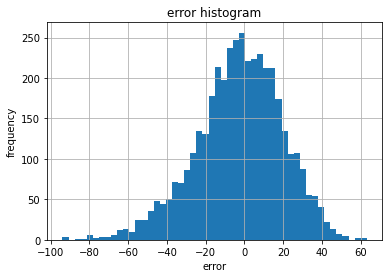

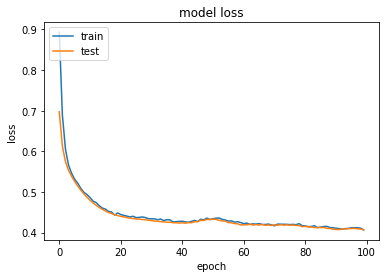

,0
count,4125.000000
mean,-2.642336
std,22.173512
min,-93.894291
25%,-15.896391
50%,-1.600946
75%,12.733616
max,63.146700


In [11]:
def ai_errors(predictions, observations, history = None) :
    '''
    PURPOSE: Provide descriptive statistics on the predicted output versus the observed measurments
    METHOD:  Take the errors of the predictions and answers and then calculate standard descriptive statistics
    INPUT:   predictions - 2D array of predictions of observed output
             observations - 2D array measurements of observed output
             history - Keras history model for displaying model loss, default is None if not available
    OUTPUT:
    '''
    errors = []
    for i in range(len(predictions)) :
        for j in range(len(predictions[i])) :
            # Calculate errors
            error = predictions[i][j] - observations[i][j]
            errors.append(error)
    
    # Display history and erros
    plt.figure(1)
    plt.hist(errors, bins = 50)
    plt.title('error histogram')
    plt.xlabel('error')
    plt.ylabel('frequency')
    plt.grid(True)
    
    plt.figure(2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    return pd.DataFrame(errors)

# Predict values
wind_predictions = model_wind.predict(X_test)
lat_predictions = model_lat.predict(X_test)
long_predictions = model_long.predict(X_test)

# Scale back our predictions
# Wind
wind_predictions_scaled = [scaler.inverse_transform([[0,0,winds[0],0,0,0,0,0,0,0,0] for winds in prediction])
                           for prediction in wind_predictions]
y_wind_test_scaled = [scaler.inverse_transform([[0,0,winds[0],0,0,0,0,0,0,0,0] for winds in observation])
                      for observation in y_test_wind]
# Latitude
lat_predictions_scaled = [scaler.inverse_transform([[lat[0],0,0,0,0,0,0,0,0,0,0] for lat in prediction])
                          for prediction in lat_predictions]
y_lat_test_scaled = [scaler.inverse_transform([[lat[0],0,0,0,0,0,0,0,0,0,0] for lat in observation])
                     for observation in y_test_lat]
# Longitude
long_predictions_scaled = [scaler.inverse_transform([[0,long[0],0,0,0,0,0,0,0,0,0] for long in prediction])
                           for prediction in long_predictions]
y_long_test_scaled = [scaler.inverse_transform([[0,long[0],0,0,0,0,0,0,0,0,0] for long in observation])
                      for observation in y_test_long]

# Record wind predictions and observations
print("Wind")
wind_predictions = [[pred[2] for pred in hurricanes_pred] for hurricanes_pred in wind_predictions_scaled]
wind_observations = [[obsrv[2] for obsrv in hurricanes_obsrv] for hurricanes_obsrv in y_wind_test_scaled]

# Present Errors
ai_errors(wind_predictions, wind_observations, model_wind_history).describe()


Lat


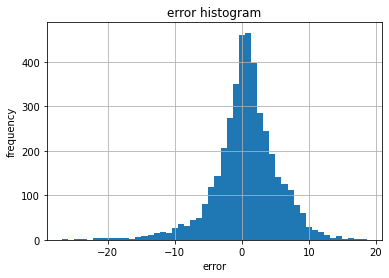

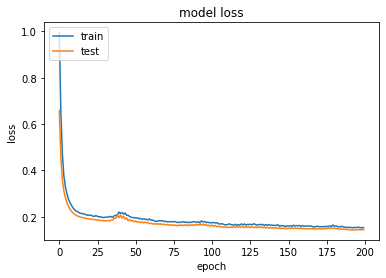

,0
count,4125.000000
mean,0.648809
std,4.732064
min,-26.801007
25%,-1.553417
50%,0.719731
75%,3.265383
max,18.617965


In [12]:
print("Lat")
lat_predictions = [[pred[0] for pred in hurricanes_pred] for hurricanes_pred in lat_predictions_scaled]
lat_observations = [[obsrv[0] for obsrv in hurricanes_obsrv] for hurricanes_obsrv in y_lat_test_scaled]
ai_errors(lat_predictions, lat_observations, model_lat_history).describe()

Long


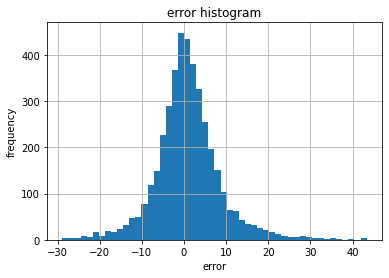

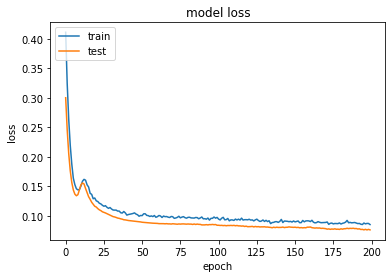

,0
count,4125.000000
mean,0.913807
std,7.817549
min,-28.863577
25%,-3.141087
50%,0.492245
75%,4.545032
max,43.346043


In [13]:
print("Long")
long_predictions = [[pred[1] for pred in hurricanes_pred] for hurricanes_pred in long_predictions_scaled]
long_observations = [[obsrv[1] for obsrv in hurricanes_obsrv] for hurricanes_obsrv in y_long_test_scaled]
ai_errors(long_predictions, long_observations, model_long_history).describe()

In [14]:
test_data = hurdat2('data/hurdat2-1851-2017-050118.txt')

# Parse in hurricanes
hurricanes_2017 = dict()
print("Transforming 2017 HURDAT2 into objects . . .")
for index, entry in test_data.hurricanes.iterrows() :
    print("Transforming {}/{} entries from HURDAT2".format(index + 1, len(dataset.hurricanes)), end = "\r")
    # Filter to capture 2017 data
    if entry['storm_id'][-4:] != '2017' :
        continue
    if entry['storm_id'] not in hurricanes_2017 :
        hurricanes_2017[entry['storm_id']] = hurricane(entry['storm_name'], entry['storm_id'])
        storm_ids[entry['storm_id']] = entry['storm_name']
    # Add entry to hurricane
    hurricanes_2017[entry['storm_id']].add_entry(entry[2:])
print("\nDone!")

# Filter storms that have more than 6 entries. We need at least 6 to calculate 5 speed vectors
storms_filter = [storm for storm in hurricanes_2017.values() if len(storm.entries) > 6]

# Begin creating hurricane forecast and track predictions
tracks = {
    'storms' : [], # Reference storm
    'inputs' : [], # The inputs for the ai
    'valid_times' : [], # The valid time to compare to the error database
}
for index, storm in enumerate(storms_filter) :
    # Create inputs to ai. ai requires scaled data as input
    entries = [entry[1] for entry in sorted(storm.entries.items())] # Extracts data from data structure
    
    # Scale the entries
    for start_index in range(1, len(entries) - 5) : # Go through each entry
        # Build feature extraction
        extracted_features = []
        valid_time = None # Going to be set to the last element in the series
        for pivot in range(start_index, start_index + 5) :
            extracted_features.append(np.array(list(feature_extraction(entries[pivot], entries[pivot - 1]).values())))
            if pivot is start_index + 4 : # We're on the last element
                valid_time = entries[pivot]['entry_time']
        
        # If there's an incomplete value we can't process, skip it
        if any(None in entry for entry in extracted_features) :
            continue
            
        # Scale extracted features        
        scaled_entries = scaler.transform(extracted_features)
        
        # Add to our results
        tracks['storms'].append(storm)
        tracks['inputs'].append(scaled_entries.tolist())
        tracks['valid_times'].append(valid_time)
        
    print("\rDone with track processing {}/{} storms".format(index + 1, len(storms_filter)), end = '')
tracks['inputs'] = np.array(tracks['inputs'])


Transforming 2017 HURDAT2 into objects . . .
Transforming 50303/20291 entries from HURDAT2
Done!
Done with track processing 18/18 storms

In [15]:
tracks['wind_predictions_raw'] = model_wind.predict(tracks['inputs'])
tracks['lat_predictions_raw'] = model_lat.predict(tracks['inputs'])
tracks['long_predictions_raw'] = model_long.predict(tracks['inputs'])

In [16]:
# Define a function to return the distance between two coordinates in nautical miles
import math

def distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371 # km

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return d * 0.539957 # km to nautical miles

In [17]:
# Scale back and store our wind predictions and our lat, long predictions
tracks['wind_predictions'] = []
tracks['lat_predictions'] = []
tracks['long_predictions'] = []
intensity_errors = {
    '24' : [],
    '48' : [],
    '72' : [],
    '96' : [],
    '120' : []
}
track_errors = {
    '24' : [],
    '48' : [],
    '72' : [],
    '96' : [],
    '120' : []
}
for index, prediction in enumerate(tracks['wind_predictions_raw']) :
    # Use our standard scaler to scale the raw predictions back
    winds_scaled = [scaler.inverse_transform([[0,0,winds[0],0,0,0,0,0,0,0,0] for winds in prediction])] # Index 2 is winds
    lat_scaled = [scaler.inverse_transform([[lats[0],0,0,0,0,0,0,0,0,0,0] for lats in tracks['lat_predictions_raw'][index]])] # Index 0 is lat
    long_scaled = [scaler.inverse_transform([[0,longs[0],0,0,0,0,0,0,0,0,0] for longs in tracks['long_predictions_raw'][index]])] # Index 1 is long
    
    # Extract the wind prediction from data structure and store into new data structure
    for i in range(len(winds_scaled)) :        
        # The new data structure is a tuple of (wind, storm_id, valid_time, forecast_time)
        wind_predictions = []
        lat_predictions = []
        long_predictions = []
        for step, pred in enumerate(winds_scaled[i]) :
            wind = pred[2]
            lat = lat_scaled[i][step][0]
            long = long_scaled[i][step][1]
            
            storm_id = tracks['storms'][index].id
            valid_time = tracks['valid_times'][index]
            forecast_time = valid_time + datetime.timedelta(days = step + 1)
            
            # See if we can find the error
            if forecast_time in hurricanes_2017[storm_id].entries :
                wind_truth = hurricanes_2017[storm_id].entries[forecast_time]['max_wind']
                lat_truth = hurricanes_2017[storm_id].entries[forecast_time]['lat']
                long_truth = hurricanes_2017[storm_id].entries[forecast_time]['long']
                intensity_error = abs(wind_truth - wind)
                track_error = distance((lat_truth,long_truth), (lat, long))
                
                wind_predictions.append({
                    'ai-wind' : wind,
                    'truth' : wind_truth,
                    'storm_id' : storm_id,
                    'valid_time' : valid_time,
                    'forecast_time' : forecast_time
                })
                lat_predictions.append({
                    'ai-lat' : lat,
                    'truth' : lat_truth,
                    'storm_id' : storm_id,
                    'valid_time' : valid_time,
                    'forecast_time' : forecast_time
                })
                long_predictions.append({
                    'ai-long' : long,
                    'truth' : long_truth,
                    'storm_id' : storm_id,
                    'valid_time' : valid_time,
                    'forecast_time' : forecast_time
                })
                if step is 0 :
                    intensity_errors['24'].append(intensity_error)
                    track_errors['24'].append(track_error)
                if step is 1 :
                    intensity_errors['48'].append(intensity_error)
                    track_errors['48'].append(track_error)
                if step is 2 :
                    intensity_errors['72'].append(intensity_error)
                    track_errors['72'].append(track_error)
                if step is 3 :
                    intensity_errors['96'].append(intensity_error)
                    track_errors['96'].append(track_error)
                if step is 4 :
                    intensity_errors['120'].append(intensity_error)
                    track_errors['120'].append(track_error)
                    
        tracks['wind_predictions'].append(wind_predictions)
        tracks['lat_predictions'].append(lat_predictions)
        tracks['long_predictions'].append(long_predictions)

In [18]:
pd.DataFrame(intensity_errors['24']).describe()

,0
count,432.000000
mean,15.691219
std,12.845067
min,0.034727
25%,6.166001
50%,12.217220
75%,21.896656
max,66.937684


In [19]:
pd.DataFrame(intensity_errors['48']).describe()

,0
count,378.000000
mean,20.208181
std,15.431390
min,0.061193
25%,7.469377
50%,18.652873
75%,28.310771
max,80.263997


In [21]:
pd.DataFrame(intensity_errors['72']).describe()

,0
count,327.000000
mean,22.226900
std,17.367057
min,0.004513
25%,6.455700
50%,21.139434
75%,33.428042
max,72.187331


In [23]:
pd.DataFrame(intensity_errors['96']).describe()

,0
count,285.000000
mean,23.596176
std,18.168817
min,0.008265
25%,8.828873
50%,19.906430
75%,34.123798
max,81.745632


In [24]:
pd.DataFrame(intensity_errors['120']).describe()

,0
count,249.000000
mean,25.052510
std,19.098489
min,0.237530
25%,10.844180
50%,19.664527
75%,36.197853
max,86.040704


In [25]:
pd.DataFrame(track_errors['24']).describe()

,0
count,432.000000
mean,311.679468
std,208.401074
min,13.003971
25%,161.728837
50%,259.572352
75%,404.293283
max,1289.353632


In [26]:
pd.DataFrame(track_errors['48']).describe()

,0
count,378.000000
mean,338.917932
std,248.991508
min,17.050405
25%,158.552502
50%,268.315669
75%,461.480930
max,1140.513067


In [27]:
pd.DataFrame(track_errors['72']).describe()

,0
count,327.000000
mean,470.962160
std,302.422827
min,23.956694
25%,228.601022
50%,396.409628
75%,654.801274
max,1476.017470


In [28]:
pd.DataFrame(track_errors['96']).describe()

,0
count,285.000000
mean,614.962265
std,354.731210
min,40.122124
25%,322.706026
50%,539.543559
75%,867.906984
max,1642.869276


In [29]:
pd.DataFrame(track_errors['120']).describe()

,0
count,249.000000
mean,748.238900
std,413.195510
min,105.124871
25%,445.860064
50%,683.413071
75%,1020.304955
max,1937.701010


In [30]:
# Compare predictions when we can find them
import errors
errordb = errors.models.models("errors/1970-present_OFCL_v_BCD5_ind_ATL_TI_errors_noTDs.txt")
ai_wind_errors = []
ai_track_errors = []
bcd5_wind_errors = []
bcd5_track_errors = []
for index, prediction in enumerate(tracks['wind_predictions']) :
    # Find the time stamp for the storm ID in the error database
    if prediction == [] :
      continue
    valid_time = prediction[0]['valid_time']
    storm_id = prediction[0]['storm_id']
    # Check to see if we have error for this storm and at the valid time
    if storm_id in errordb.models['BCD5'].storm and valid_time in errordb.models['BCD5'].storm[storm_id] :
        print("Found {} at {}".format(storm_id, valid_time))
        # If we find it, compare
        for i, forecast in enumerate(prediction) :
            # See if we can find another prediction like that in the error database
            if errordb.models['BCD5'].storm[storm_id][valid_time]['intensity_forecast'][forecast['forecast_time'].to_pydatetime()] :
                print("\tIntensity Truth: {}, AI forecast: {}, BCD5 forecast: {}".format(forecast['truth'],
                                                                                         forecast['ai-wind'],
                                                                                         errordb.models['BCD5'].storm[storm_id][valid_time]['track_forecast'][forecast['forecast_time'].to_pydatetime()]))
                print("\tTrajectory Truth: {}, {}; AI forecast: {}, {} ; AI error: {} BCD5 error: {}".format(tracks['lat_predictions'][index][i]['truth'],
                                                                                                       tracks['long_predictions'][index][i]['truth'],
                                                                                                       tracks['lat_predictions'][index][i]['ai-lat'],
                                                                                                       tracks['long_predictions'][index][i]['ai-long'],
                                                                                                       distance((tracks['lat_predictions'][index][i]['truth'], tracks['long_predictions'][index][i]['truth']), (tracks['lat_predictions'][index][i]['ai-lat'], tracks['long_predictions'][index][i]['ai-long'])),
                                                                                                       errordb.models['BCD5'].storm[storm_id][valid_time]['intensity_forecast'][forecast['forecast_time'].to_pydatetime()]
                                                                                                      ))
                ai_wind_errors.append(abs(forecast['truth'] - forecast['ai-wind']))
                ai_track_errors.append(abs(distance((tracks['lat_predictions'][index][i]['truth'], tracks['long_predictions'][index][i]['truth']), (tracks['lat_predictions'][index][i]['ai-lat'], tracks['long_predictions'][index][i]['ai-long']))))
                bcd5_wind_errors.append(abs(errordb.models['BCD5'].storm[storm_id][valid_time]['track_forecast'][forecast['forecast_time'].to_pydatetime()]))                
                bcd5_track_errors.append(abs(errordb.models['BCD5'].storm[storm_id][valid_time]['intensity_forecast'][forecast['forecast_time'].to_pydatetime()]))

Found AL012017 at 2017-04-20 06:00:00
	Intensity Truth: 45.0, AI forecast: 41.21337868273258, BCD5 forecast: -19.0
	Trajectory Truth: 40.0, 46.3; AI forecast: 30.499339616298677, 42.688531604409214 ; AI error: 597.1236486505317 BCD5 error: 391.5
Found AL012017 at 2017-04-20 12:00:00
Found AL012017 at 2017-04-20 18:00:00
Found AL012017 at 2017-04-21 00:00:00
Found AL012017 at 2017-04-21 06:00:00
Found AL032017 at 2017-06-21 00:00:00
	Intensity Truth: 45.0, AI forecast: 54.42827820777893, BCD5 forecast: 15.0
	Trajectory Truth: 28.5, 93.4; AI forecast: 27.127642703056335, 86.19248477816582 ; AI error: 391.44571311710894 BCD5 error: 42.6
Found AL032017 at 2017-06-21 06:00:00
	Intensity Truth: 45.0, AI forecast: 56.46032989025116, BCD5 forecast: 11.0
	Trajectory Truth: 29.4, 93.6; AI forecast: 27.804933738708495, 86.5022172987461 ; AI error: 386.13432612757504 BCD5 error: 36.6
Found AL032017 at 2017-06-21 12:00:00
	Intensity Truth: 40.0, AI forecast: 60.49320548772812, BCD5 forecast: 13.0
	

	Trajectory Truth: 30.1, 56.0; AI forecast: 36.83546285629272, 46.94364854395389 ; AI error: 607.1302620462428 BCD5 error: 467.8
	Intensity Truth: 90.0, AI forecast: 57.11043864488602, BCD5 forecast: -30.0
	Trajectory Truth: 32.1, 57.3; AI forecast: 38.01310045719147, 44.60309851765632 ; AI error: 716.9888722196619 BCD5 error: 587.0
	Intensity Truth: 70.0, AI forecast: 58.72208058834076, BCD5 forecast: -8.0
	Trajectory Truth: 37.3, 53.8; AI forecast: 39.19109554290772, 42.604040753841396 ; AI error: 539.6200963801818 BCD5 error: 410.6
Found AL142017 at 2017-09-24 12:00:00
	Intensity Truth: 80.0, AI forecast: 67.94665962457657, BCD5 forecast: 5.0
	Trajectory Truth: 30.8, 49.7; AI forecast: 30.635483503341675, 52.26537408083677 ; AI error: 132.78043068442108 BCD5 error: 44.7
	Intensity Truth: 90.0, AI forecast: 71.32025986909866, BCD5 forecast: -10.0
	Trajectory Truth: 29.9, 53.2; AI forecast: 35.07019381523132, 49.64719424173236 ; AI error: 358.7285972679413 BCD5 error: 292.1
	Intensity

	Trajectory Truth: 34.6, 48.7; AI forecast: 27.73638377189636, 50.607161650061606 ; AI error: 423.55340495925674 BCD5 error: 108.5
	Intensity Truth: 45.0, AI forecast: 41.05983294546604, BCD5 forecast: 3.0
	Trajectory Truth: 41.8, 48.8; AI forecast: 29.735559785366057, 47.75223827809095 ; AI error: 726.1339670795354 BCD5 error: 416.2
Found AL192017 at 2017-11-07 06:00:00
	Intensity Truth: 50.0, AI forecast: 44.15396798402071, BCD5 forecast: 0.0
	Trajectory Truth: 36.4, 48.7; AI forecast: 28.365745556354522, 50.27874787598848 ; AI error: 488.9532742909848 BCD5 error: 133.5
Found AL192017 at 2017-11-07 12:00:00
	Intensity Truth: 45.0, AI forecast: 45.579217886552215, BCD5 forecast: 1.0
	Trajectory Truth: 38.3, 48.8; AI forecast: 29.448167526721953, 50.16213396862149 ; AI error: 535.7681254218728 BCD5 error: 178.4
Found AL192017 at 2017-11-07 18:00:00
	Intensity Truth: 45.0, AI forecast: 46.91776152700186, BCD5 forecast: -4.0
	Trajectory Truth: 40.1, 49.0; AI forecast: 30.68335267305374, 

In [32]:
tracks['inputs'][:1]

array([[[ 1.18253968, -0.23901582,  0.28571429,  0.        ,
         -0.55      , -2.        , -1.25      ,  1.        ,
         -5.        , -0.0625    ,  0.4       ],
        [ 1.12698413, -0.26713533,  0.28571429,  0.        ,
         -0.7       , -2.        , -1.25      ,  1.        ,
         -5.        , -0.0625    ,  0.8       ],
        [ 1.07142857, -0.29876977,  0.14285714, -1.        ,
         -0.65      , -2.        , -1.33333333,  1.        ,
         -5.        ,  0.        , -0.4       ],
        [ 1.03174603, -0.32688928,  0.        , -1.        ,
         -0.6       , -1.6       , -1.25      ,  1.        ,
         -5.        ,  0.        ,  0.        ],
        [ 0.99206349, -0.35852373,  0.        ,  0.        ,
         -0.55      , -1.6       , -1.33333333,  1.        ,
         -5.        ,  0.        ,  0.4       ]]])

In [34]:
[output[2] for output in 
 scaler.inverse_transform(
     [[0,0,winds[0],0,0,0,0,0,0,0,0] for winds in model_wind.predict(tracks['inputs'][:1])[0]]
 )]

[46.941653955727816,
 47.425946816802025,
 44.22392796725035,
 42.85913407802582,
 44.00462821125984]

In [35]:
def hurricane_ai(input):
  '''
  input = {
    -120 : timestep,
    -96 : timestep,
    -72 : timestep,
    -48 : timestep,
    -24 : timestep,
    0 : timestep
  }
  output = {
    24 : prediction,
    48 : prediction,
    72 : prediction,
    96 : prediction,
    120 : prediction
  }
  timestep = {
      'lat' : float,
      'long' : float,
      'max-wind' : float,
      'min_pressure' : float,
      'entry-time' : datetime
  }
  prediction = {
    'lat' : float,
    'long' : float,
    'max-winds' : float
  }
  '''
  # Take entries and transform them into our data model
  extract = []
  temp = None
  for index, value in enumerate([-120, -96, -72, -48, -24, 0]):
    if not index :
      temp = input[value]
      continue
    else:
      extract.append(list(feature_extraction(input[value], temp).values()))
      temp = input[value]
  
  state = np.expand_dims(scaler.transform(extract), axis = 0)
  print('extract: {}, state: {}'.format(extract, state))
  # Finally, use our hurricane ai to predict storm state
  lat = [output[0] for output in scaler.inverse_transform(
      [[lat[0],0,0,0,0,0,0,0,0,0,0] for lat in model_lat.predict(state)[0]])]
  long = [output[1] for output in scaler.inverse_transform(
      [[0,long[0],0,0,0,0,0,0,0,0,0] for long in model_long.predict(state)[0]])]
  wind = [output[2] for output in scaler.inverse_transform(
      [[0,0,wind[0],0,0,0,0,0,0,0,0] for wind in model_wind.predict(state)[0]])]
   
  output = dict()
  for index, value in enumerate([24, 48, 72, 96, 120]) :
    output[value] = {
        'lat' : lat[index],
        'long' : long[index],
        'max_wind' : wind[index]
    }
  
  return output

In [38]:
from dateutil.parser import parse
input = {
  0 : {
      'entry_time' : parse('Fri Aug 30 2019 1100 PM'),
      'lat' : 25.5,
      'long' : 71.4,
      'max_wind' : 140 / 1.51 , # mph to knots
      'min_pressure' : 948.0
    }
  -24 : {
      'entry_time' : parse('Thu Aug 29 2019 1100 PM'),
      'lat' : 23.3,
      'long' : 68.4,
      'max_wind' : 105 / 1.51 , # mph to knots
      'min_pressure' : 977.0
    },
  -48 : {
      'entry_time' : parse('Wed Aug 28 2019 1100 PM'),
      'lat' : 19.7,
      'long' : 66.0,
      'max_wind' : 85 / 1.51 , # mph to knots
      'min_pressure' : 986.0
    },
  -72 : {
      'entry_time' : parse('Tue Aug 27 2019 1100 PM'),
      'lat' : 16.0,
      'long' : 63.0,
      'max_wind' : 50 / 1.51 , # mph to knots
      'min_pressure' : 1006.0
    },
  -96 : {
      'entry_time' : parse('Mon Aug 26 2019 1100 PM'),
      'lat' : 13.2,
      'long' : 59.7,
      'max_wind' : 50 / 1.51 , # mph to knots
      'min_pressure' : 1003.0
    },
  -120 : {
      'entry_time' : parse('Sun Aug 25 2019 1100 PM'),
      'lat' : 11.7,
      'long' : 55.3,
      'max_wind' : 50 / 1.51 , # mph to knots
      'min_pressure' : 1003.0
    }
}

SyntaxError: invalid syntax (<ipython-input-38-ca89dd47912f>, line 10)

In [39]:
hurricane_ai(input)

TypeError: 'method' object is not subscriptable